TMDB Movie Data Analysis Project \
 Phase 4: Data Visualization \
Step 5: Complete Visualization Suite

This script creates all required visualizations for the project.


In [1]:
# ============================================================================
# IMPORTS
# ============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [2]:
# ============================================================================
# SETUP
# ============================================================================


# Create images folder if it doesn't exist
if not os.path.exists('images'):
    os.makedirs('images')
    print("\n Created 'images' folder for saving visualizations")

# Load data with KPIs
df = pd.read_csv('movies_with_kpis.csv')
print(f"\n Loaded data: {df.shape[0]} movies × {df.shape[1]} columns")

# Convert release_date to datetime for time-based analysis
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_year'] = df['release_date'].dt.year

print(f" Data ready for visualization!")


 Loaded data: 18 movies × 25 columns
 Data ready for visualization!


 Saved: images/1_revenue_vs_budget.png


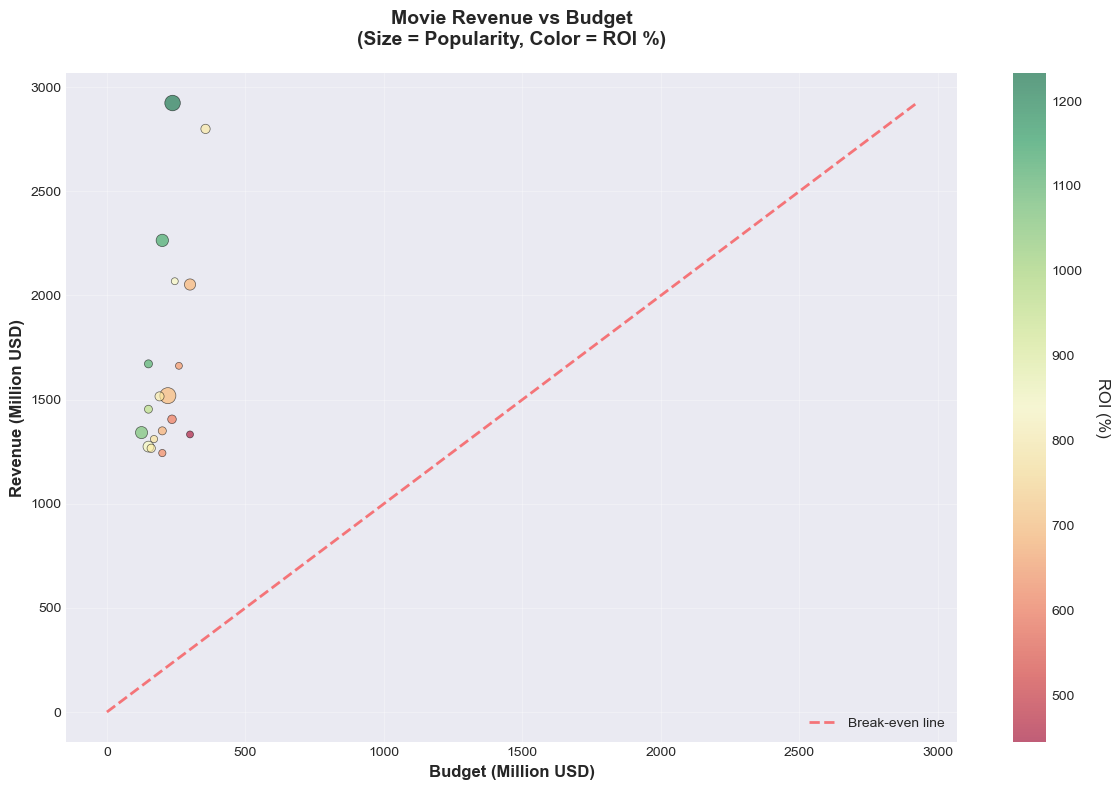

In [3]:
# ============================================================================
# VISUALIZATION 1: Revenue vs Budget Scatter Plot (with ROI color coding)
# ============================================================================


fig, ax = plt.subplots(figsize=(12, 8))

# Create scatter plot with ROI as color
scatter = ax.scatter(
    df['budget_musd'], 
    df['revenue_musd'],
    c=df['roi_percent'],  # Color by ROI
    s=df['popularity'] * 3,  # Size by popularity
    alpha=0.6,
    cmap='RdYlGn',  # Red to Green colormap (Red=low ROI, Green=high ROI)
    edgecolors='black',
    linewidth=0.5
)

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('ROI (%)', rotation=270, labelpad=20, fontsize=12)

# Add diagonal line (break-even line where revenue = budget)
max_val = max(df['budget_musd'].max(), df['revenue_musd'].max())
ax.plot([0, max_val], [0, max_val], 'r--', linewidth=2, alpha=0.5, label='Break-even line')

# Labels and title
ax.set_xlabel('Budget (Million USD)', fontsize=12, fontweight='bold')
ax.set_ylabel('Revenue (Million USD)', fontsize=12, fontweight='bold')
ax.set_title('Movie Revenue vs Budget\n(Size = Popularity, Color = ROI %)', 
             fontsize=14, fontweight='bold', pad=20)

# Add grid
ax.grid(True, alpha=0.3)

# Add legend
ax.legend(fontsize=10)

# Tight layout
plt.tight_layout()

# Save
plt.savefig('images/1_revenue_vs_budget.png', dpi=300, bbox_inches='tight')
print(" Saved: images/1_revenue_vs_budget.png")

plt.show()

 Saved: images/2_roi_by_genre.png


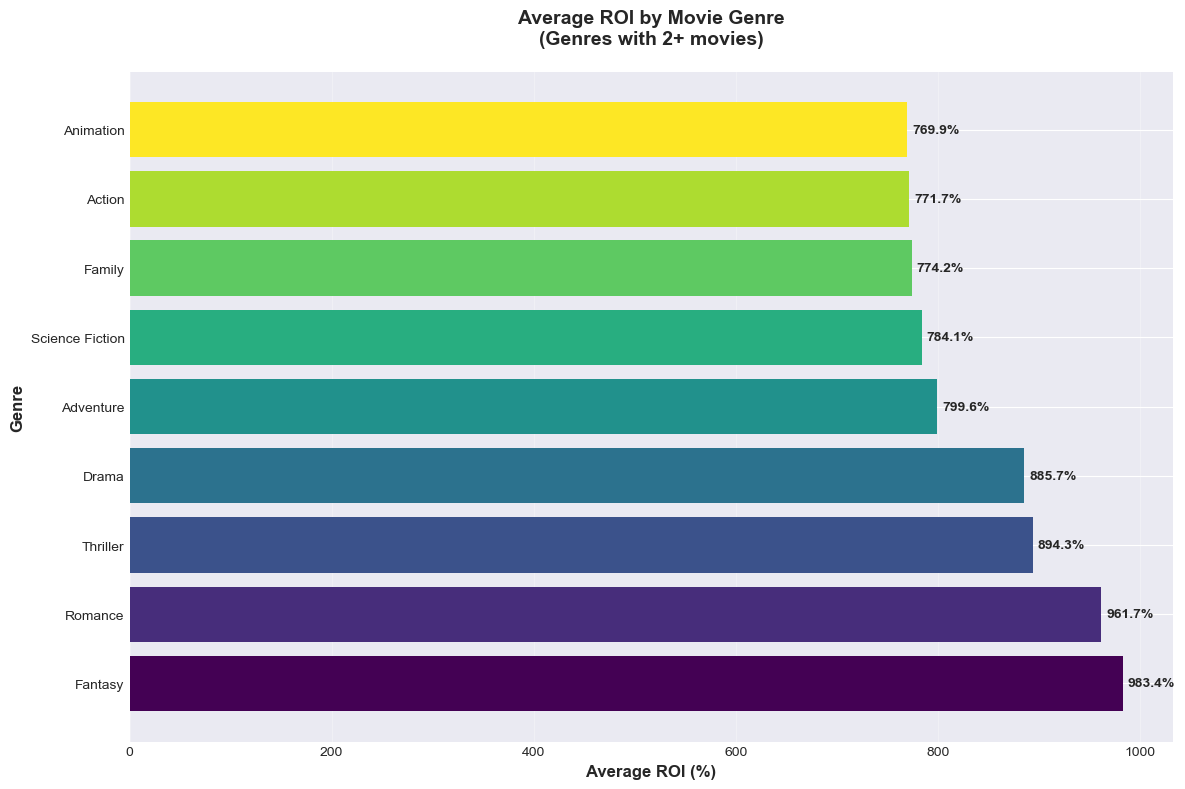

In [4]:
# ============================================================================
# VISUALIZATION 2: ROI Distribution by Genre
# ============================================================================


# Extract individual genres and calculate mean ROI
genre_roi = []

for idx, row in df.iterrows():
    if pd.notna(row['genres']) and pd.notna(row['roi_percent']):
        genres = str(row['genres']).split('|')
        for genre in genres:
            genre = genre.strip()
            genre_roi.append({'genre': genre, 'roi': row['roi_percent']})

genre_roi_df = pd.DataFrame(genre_roi)

# Calculate mean ROI per genre
genre_stats = genre_roi_df.groupby('genre')['roi'].agg(['mean', 'count']).reset_index()
genre_stats = genre_stats[genre_stats['count'] >= 2]  # Only genres with 2+ movies
genre_stats = genre_stats.sort_values('mean', ascending=False)

# Create bar plot
fig, ax = plt.subplots(figsize=(12, 8))

bars = ax.barh(genre_stats['genre'], genre_stats['mean'], 
               color=plt.cm.viridis(np.linspace(0, 1, len(genre_stats))))

# Add value labels
for i, (bar, value) in enumerate(zip(bars, genre_stats['mean'])):
    ax.text(value + 5, bar.get_y() + bar.get_height()/2, 
            f'{value:.1f}%', 
            va='center', fontsize=10, fontweight='bold')

# Labels and title
ax.set_xlabel('Average ROI (%)', fontsize=12, fontweight='bold')
ax.set_ylabel('Genre', fontsize=12, fontweight='bold')
ax.set_title('Average ROI by Movie Genre\n(Genres with 2+ movies)', 
             fontsize=14, fontweight='bold', pad=20)

# Add grid
ax.grid(True, axis='x', alpha=0.3)

# Tight layout
plt.tight_layout()

# Save
plt.savefig('images/2_roi_by_genre.png', dpi=300, bbox_inches='tight')
print(" Saved: images/2_roi_by_genre.png")

plt.show()

 Saved: images/3_popularity_vs_rating.png


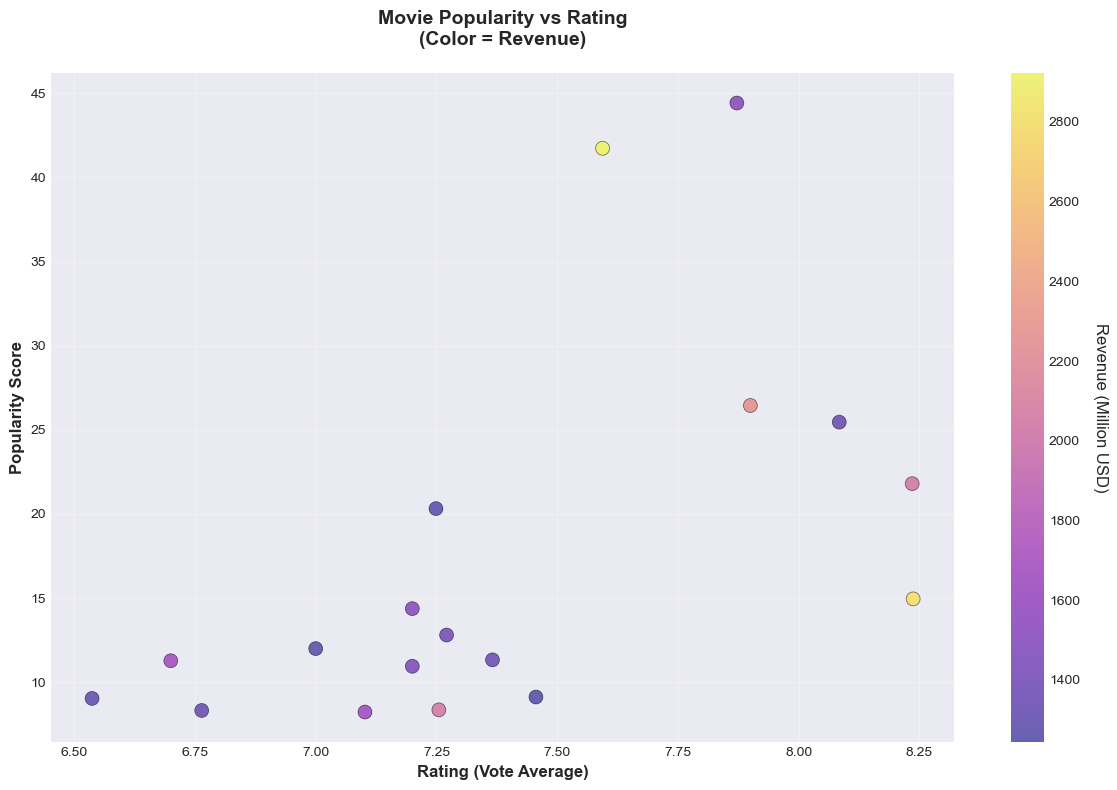

In [5]:
# ============================================================================
# VISUALIZATION 3: Popularity vs Rating Scatter Plot
# ============================================================================


fig, ax = plt.subplots(figsize=(12, 8))

# Create scatter plot
scatter = ax.scatter(
    df['vote_average'], 
    df['popularity'],
    c=df['revenue_musd'],  # Color by revenue
    s=100,
    alpha=0.6,
    cmap='plasma',
    edgecolors='black',
    linewidth=0.5
)

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Revenue (Million USD)', rotation=270, labelpad=20, fontsize=12)

# Labels and title
ax.set_xlabel('Rating (Vote Average)', fontsize=12, fontweight='bold')
ax.set_ylabel('Popularity Score', fontsize=12, fontweight='bold')
ax.set_title('Movie Popularity vs Rating\n(Color = Revenue)', 
             fontsize=14, fontweight='bold', pad=20)

# Add grid
ax.grid(True, alpha=0.3)

# Tight layout
plt.tight_layout()

# Save
plt.savefig('images/3_popularity_vs_rating.png', dpi=300, bbox_inches='tight')
print(" Saved: images/3_popularity_vs_rating.png")

plt.show()

 Saved: images/4_yearly_trends.png


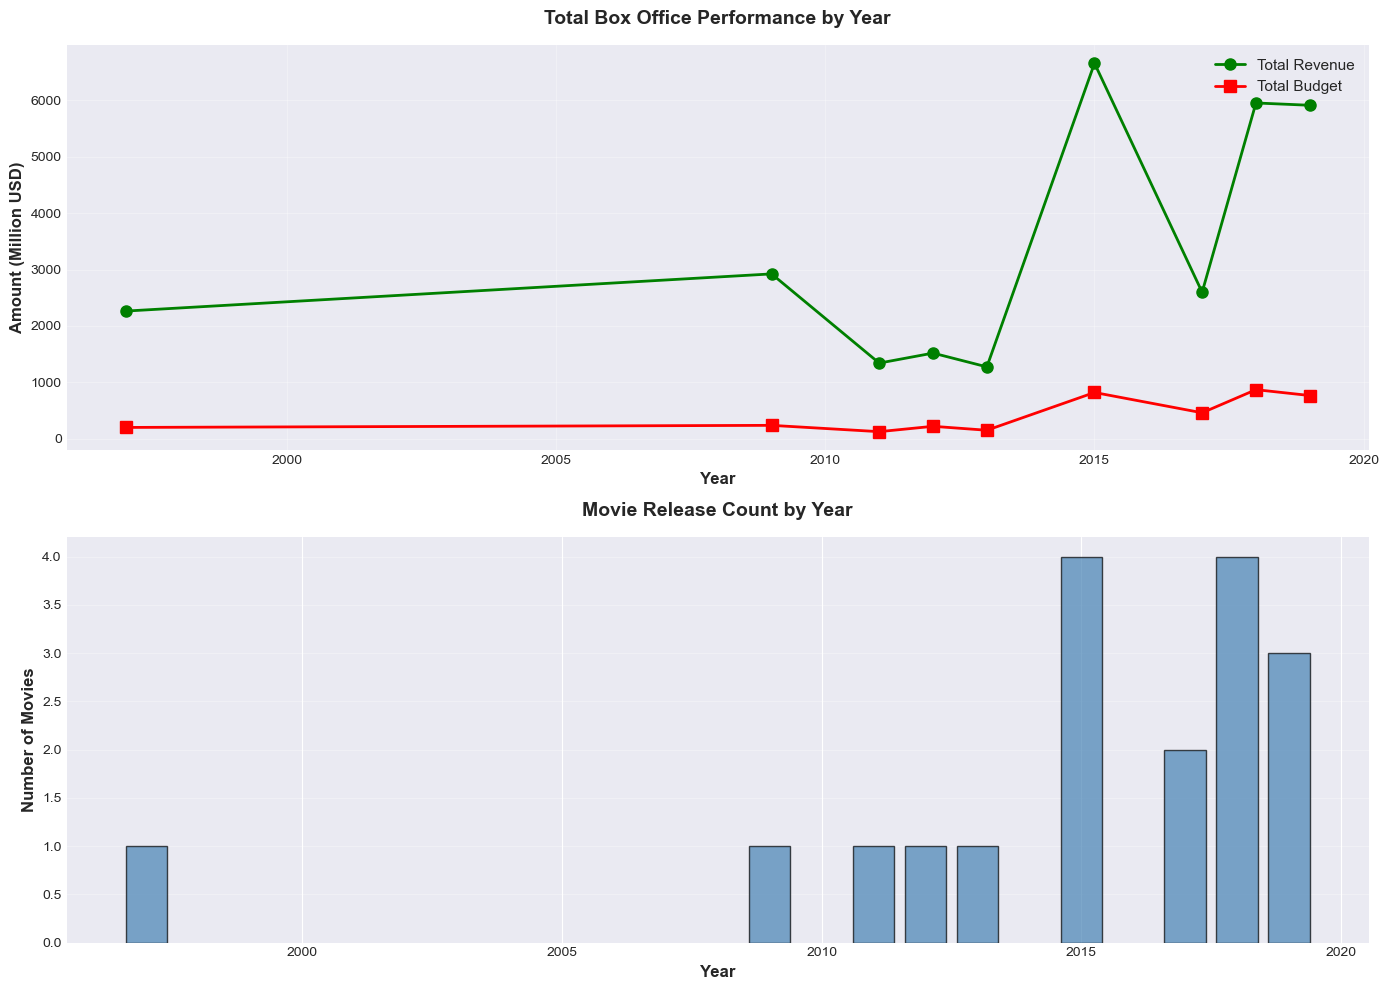

In [6]:
# ============================================================================
# VISUALIZATION 4: Yearly Box Office Trends
# ============================================================================


# Group by year
yearly_stats = df.groupby('release_year').agg({
    'revenue_musd': ['sum', 'mean'],
    'budget_musd': ['sum', 'mean'],
    'id': 'count'
}).reset_index()

yearly_stats.columns = ['year', 'total_revenue', 'avg_revenue', 
                        'total_budget', 'avg_budget', 'movie_count']

# Create figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Subplot 1: Total Revenue and Budget per Year
ax1.plot(yearly_stats['year'], yearly_stats['total_revenue'], 
         marker='o', linewidth=2, markersize=8, label='Total Revenue', color='green')
ax1.plot(yearly_stats['year'], yearly_stats['total_budget'], 
         marker='s', linewidth=2, markersize=8, label='Total Budget', color='red')

ax1.set_xlabel('Year', fontsize=12, fontweight='bold')
ax1.set_ylabel('Amount (Million USD)', fontsize=12, fontweight='bold')
ax1.set_title('Total Box Office Performance by Year', fontsize=14, fontweight='bold', pad=15)
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)

# Subplot 2: Number of Movies per Year
ax2.bar(yearly_stats['year'], yearly_stats['movie_count'], 
        color='steelblue', edgecolor='black', alpha=0.7)

ax2.set_xlabel('Year', fontsize=12, fontweight='bold')
ax2.set_ylabel('Number of Movies', fontsize=12, fontweight='bold')
ax2.set_title('Movie Release Count by Year', fontsize=14, fontweight='bold', pad=15)
ax2.grid(True, axis='y', alpha=0.3)

# Tight layout
plt.tight_layout()

# Save
plt.savefig('images/4_yearly_trends.png', dpi=300, bbox_inches='tight')
print(" Saved: images/4_yearly_trends.png")

plt.show()

 Saved: images/5_franchise_vs_standalone.png


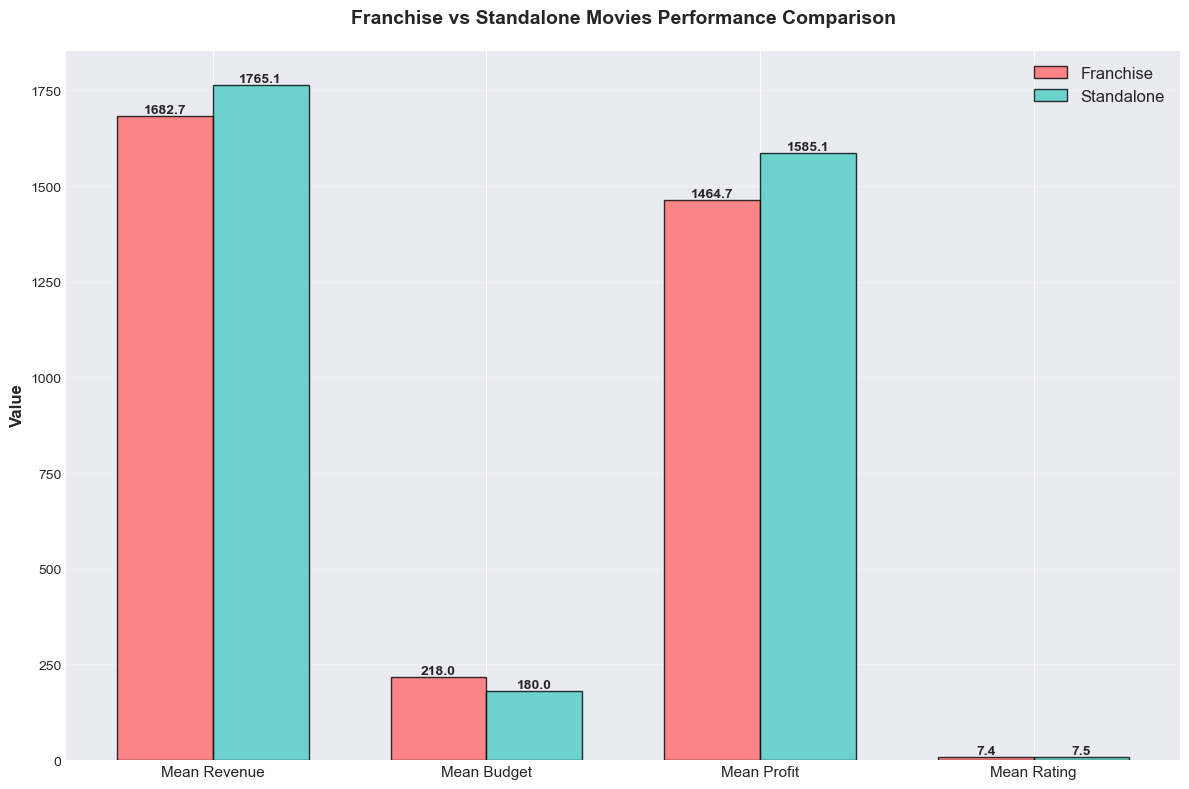

In [7]:
# ============================================================================
# VISUALIZATION 5: Franchise vs Standalone Comparison
# ============================================================================


# Create comparison data
df['is_franchise'] = df['belongs_to_collection'].notna()

comparison_data = {
    'Mean Revenue': [
        df[df['is_franchise']]['revenue_musd'].mean(),
        df[~df['is_franchise']]['revenue_musd'].mean()
    ],
    'Mean Budget': [
        df[df['is_franchise']]['budget_musd'].mean(),
        df[~df['is_franchise']]['budget_musd'].mean()
    ],
    'Mean Profit': [
        df[df['is_franchise']]['profit_musd'].mean(),
        df[~df['is_franchise']]['profit_musd'].mean()
    ],
    'Mean Rating': [
        df[df['is_franchise']]['vote_average'].mean(),
        df[~df['is_franchise']]['vote_average'].mean()
    ]
}

categories = list(comparison_data.keys())
franchise_values = [comparison_data[cat][0] for cat in categories]
standalone_values = [comparison_data[cat][1] for cat in categories]

# Create grouped bar chart
fig, ax = plt.subplots(figsize=(12, 8))

x = np.arange(len(categories))
width = 0.35

bars1 = ax.bar(x - width/2, franchise_values, width, label='Franchise', 
               color='#FF6B6B', edgecolor='black', alpha=0.8)
bars2 = ax.bar(x + width/2, standalone_values, width, label='Standalone', 
               color='#4ECDC4', edgecolor='black', alpha=0.8)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}',
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# Labels and title
ax.set_ylabel('Value', fontsize=12, fontweight='bold')
ax.set_title('Franchise vs Standalone Movies Performance Comparison', 
             fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=11)
ax.legend(fontsize=12)
ax.grid(True, axis='y', alpha=0.3)

# Tight layout
plt.tight_layout()

# Save
plt.savefig('images/5_franchise_vs_standalone.png', dpi=300, bbox_inches='tight')
print(" Saved: images/5_franchise_vs_standalone.png")

plt.show()

 Saved: images/6_top_directors.png


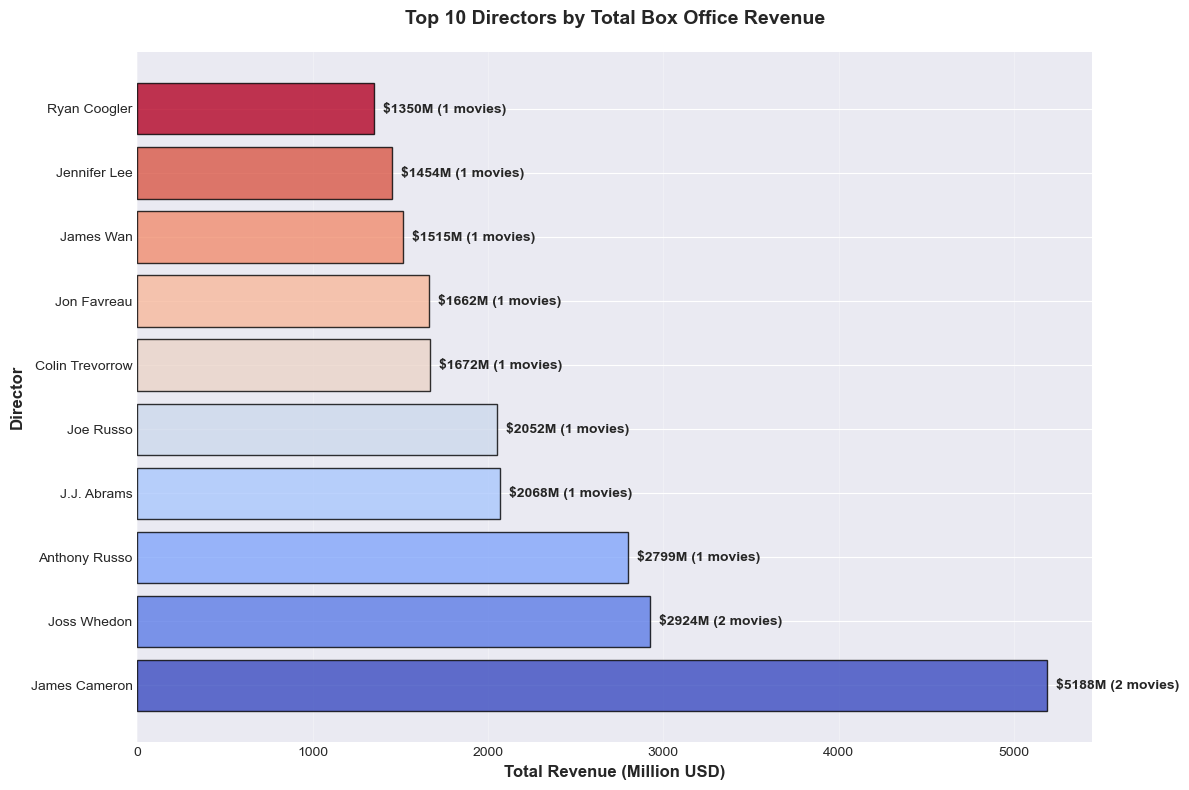

In [8]:
# ============================================================================
# VISUALIZATION 6: Top 10 Directors by Total Revenue
# ============================================================================

# Calculate director stats
director_stats = df[df['director'].notna()].groupby('director').agg({
    'revenue_musd': 'sum',
    'id': 'count'
}).reset_index()

director_stats.columns = ['director', 'total_revenue', 'movie_count']
director_stats = director_stats.sort_values('total_revenue', ascending=False).head(10)

# Create horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 8))

bars = ax.barh(director_stats['director'], director_stats['total_revenue'],
               color=plt.cm.coolwarm(np.linspace(0, 1, len(director_stats))),
               edgecolor='black', alpha=0.8)

# Add value labels
for i, (bar, value, count) in enumerate(zip(bars, director_stats['total_revenue'], 
                                             director_stats['movie_count'])):
    ax.text(value + 50, bar.get_y() + bar.get_height()/2,
            f'${value:.0f}M ({int(count)} movies)',
            va='center', fontsize=10, fontweight='bold')

# Labels and title
ax.set_xlabel('Total Revenue (Million USD)', fontsize=12, fontweight='bold')
ax.set_ylabel('Director', fontsize=12, fontweight='bold')
ax.set_title('Top 10 Directors by Total Box Office Revenue', 
             fontsize=14, fontweight='bold', pad=20)
ax.grid(True, axis='x', alpha=0.3)

# Tight layout
plt.tight_layout()

# Save
plt.savefig('images/6_top_directors.png', dpi=300, bbox_inches='tight')
print(" Saved: images/6_top_directors.png")

plt.show()

 Saved: images/7_top_franchises.png


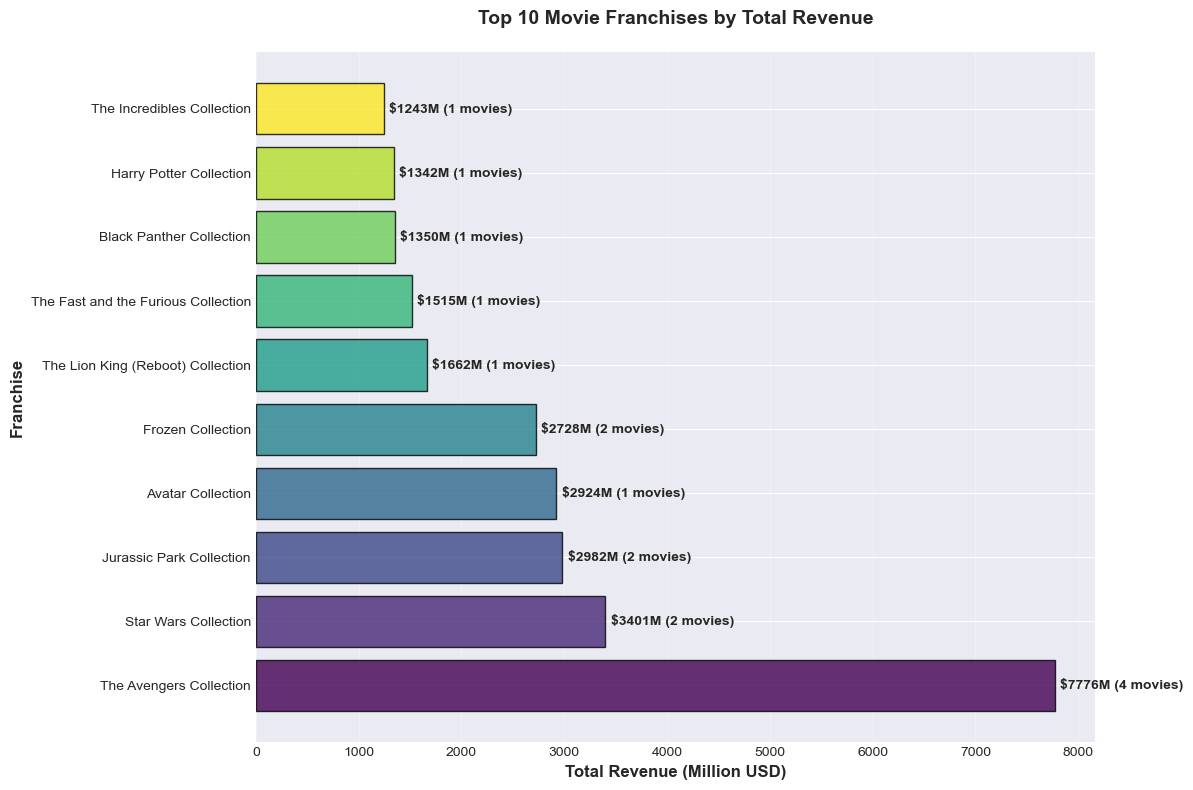

In [9]:
# ============================================================================
# VISUALIZATION 7: Top Franchises Revenue
# ============================================================================


# Calculate franchise stats
franchise_stats = df[df['belongs_to_collection'].notna()].groupby('belongs_to_collection').agg({
    'revenue_musd': 'sum',
    'id': 'count'
}).reset_index()

franchise_stats.columns = ['franchise', 'total_revenue', 'movie_count']
franchise_stats = franchise_stats.sort_values('total_revenue', ascending=False).head(10)

# Create horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 8))

bars = ax.barh(franchise_stats['franchise'], franchise_stats['total_revenue'],
               color=plt.cm.viridis(np.linspace(0, 1, len(franchise_stats))),
               edgecolor='black', alpha=0.8)

# Add value labels
for i, (bar, value, count) in enumerate(zip(bars, franchise_stats['total_revenue'], 
                                             franchise_stats['movie_count'])):
    ax.text(value + 50, bar.get_y() + bar.get_height()/2,
            f'${value:.0f}M ({int(count)} movies)',
            va='center', fontsize=10, fontweight='bold')

# Labels and title
ax.set_xlabel('Total Revenue (Million USD)', fontsize=12, fontweight='bold')
ax.set_ylabel('Franchise', fontsize=12, fontweight='bold')
ax.set_title('Top 10 Movie Franchises by Total Revenue', 
             fontsize=14, fontweight='bold', pad=20)
ax.grid(True, axis='x', alpha=0.3)

# Tight layout
plt.tight_layout()

# Save
plt.savefig('images/7_top_franchises.png', dpi=300, bbox_inches='tight')
print(" Saved: images/7_top_franchises.png")

plt.show()